In [1]:
# importing necessarry libraries
import requests
from requests.exceptions import RequestException
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Defining API Endpoints
API_ENDPOINTS = {
    "quiz_data": "https://www.jsonkeeper.com/b/LLQT",
    "current_submission": "https://api.jsonserve.com/rJvd7g",
    "historical_data": "https://api.jsonserve.com/XgAgFJ"
}

# Function to fetch JSON data from URL
def fetch_json(url):
    """Fetches JSON data from the given URL."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    except RequestException as e:
        print(f"Error fetching data from {url}: {e}")
        return None

# Fetching all API data
quiz_data = {key: fetch_json(url) for key, url in API_ENDPOINTS.items()}

# Validating data retrieval
if any(value is None for value in quiz_data.values()):
    print("Failed to retrieve data from one or more endpoints. Exiting.")
    exit()

print("All API data retrieved successfully.")

All API data retrieved successfully.


In [5]:
# Initializing performance tracking
topic_performance = {}
performance_history = []
topic_incorrect_counts = {}

# Processing historical quiz data
for quiz in quiz_data["historical_data"]:
    topic = quiz['quiz']['topic'].strip()
    accuracy = float(quiz['accuracy'].replace('%', '').strip())
    score = float(quiz['final_score'])
    incorrect_answers = quiz['incorrect_answers']
    submitted_at = quiz['submitted_at']

    # Converting timestamps
    started_at = datetime.datetime.fromisoformat(quiz['started_at'].replace('Z', '+00:00'))
    ended_at = datetime.datetime.fromisoformat(quiz['ended_at'].replace('Z', '+00:00'))
    duration_seconds = (ended_at - started_at).total_seconds()

    # Storing performance history
    performance_history.append({
        'submitted_at': submitted_at,
        'accuracy': accuracy,
        'score': score,
        'topic': topic,
        'duration_seconds': duration_seconds
    })

    # Initialize topic performance tracking
    if topic not in topic_performance:
        topic_performance[topic] = {
            'total_accuracy': 0,
            'count': 0,
            'highest_accuracy': 0,
            'lowest_accuracy': 100,
            'total_score': 0.0,
            'total_duration_seconds': 0
        }

    # Updating topic performance metrics
    topic_performance[topic]['total_accuracy'] += accuracy
    topic_performance[topic]['count'] += 1
    topic_performance[topic]['total_score'] += score
    topic_performance[topic]['total_duration_seconds'] += duration_seconds
    topic_performance[topic]['highest_accuracy'] = max(topic_performance[topic]['highest_accuracy'], accuracy)
    topic_performance[topic]['lowest_accuracy'] = min(topic_performance[topic]['lowest_accuracy'], accuracy)

    # Tracking incorrect answers per topic
    topic_incorrect_counts[topic] = topic_incorrect_counts.get(topic, 0) + incorrect_answers

# Calculating average performance per topic
for topic, data in topic_performance.items():
    data['avg_accuracy'] = data['total_accuracy'] / data['count']
    data['avg_score'] = data['total_score'] / data['count']
    data['avg_duration_minutes'] = (data['total_duration_seconds'] / data['count']) / 60

print("Historical quiz data processed successfully.")

Historical quiz data processed successfully.


In [7]:
# Sorting topics by accuracy for analysis
sorted_topic_performance_weakest = sorted(topic_performance.items(), key=lambda item: item[1]['avg_accuracy'])
sorted_topic_performance_strongest = sorted(topic_performance.items(), key=lambda item: item[1]['avg_accuracy'], reverse=True)

# Identifing top weak and strong areas
weak_areas = [topic for topic, _ in sorted_topic_performance_weakest[:3]]
strong_areas = [topic for topic, _ in sorted_topic_performance_strongest[:3]]

# Extracting accuracy trends
accuracy_trend = [p['accuracy'] for p in performance_history]
score_trend = [p['score'] for p in performance_history]

# Checking improvement trends
if len(accuracy_trend) > 1 and accuracy_trend[-1] > accuracy_trend[0]:
    improvement_trend_insight = "Recent quizzes indicate performance is improving."
else:
    improvement_trend_insight = "Performance is fluctuating and needs more consistency."



print("Performance insights generated successfully.")


Performance insights generated successfully.


In [9]:
# Generating Personalized Recommendations
print("\nPersonalized Study Recommendations:")

# Providing suggestions for weak topics
for topic in weak_areas:
    
    print(f"Focusing on {topic} is recommended. Start with easier quizzes and gradually increase difficulty.")

# Encouraging practice in strong topics
print("\nStrongest Topics:", strong_areas)
print("Consistent practice will help in retaining knowledge.")

# Advising revision strategies for weak topics
print("\nWeakest Topics:", weak_areas)
print("Revisiting key concepts and taking focused practice quizzes will be beneficial.")


Personalized Study Recommendations:
Focusing on principles of inheritance and variation is recommended. Start with easier quizzes and gradually increase difficulty.
Focusing on Human Reproduction is recommended. Start with easier quizzes and gradually increase difficulty.
Focusing on Reproductive Health is recommended. Start with easier quizzes and gradually increase difficulty.

Strongest Topics: ['microbes in human welfare', 'human health and disease', 'reproductive health']
Consistent practice will help in retaining knowledge.

Weakest Topics: ['principles of inheritance and variation', 'Human Reproduction', 'Reproductive Health']
Revisiting key concepts and taking focused practice quizzes will be beneficial.


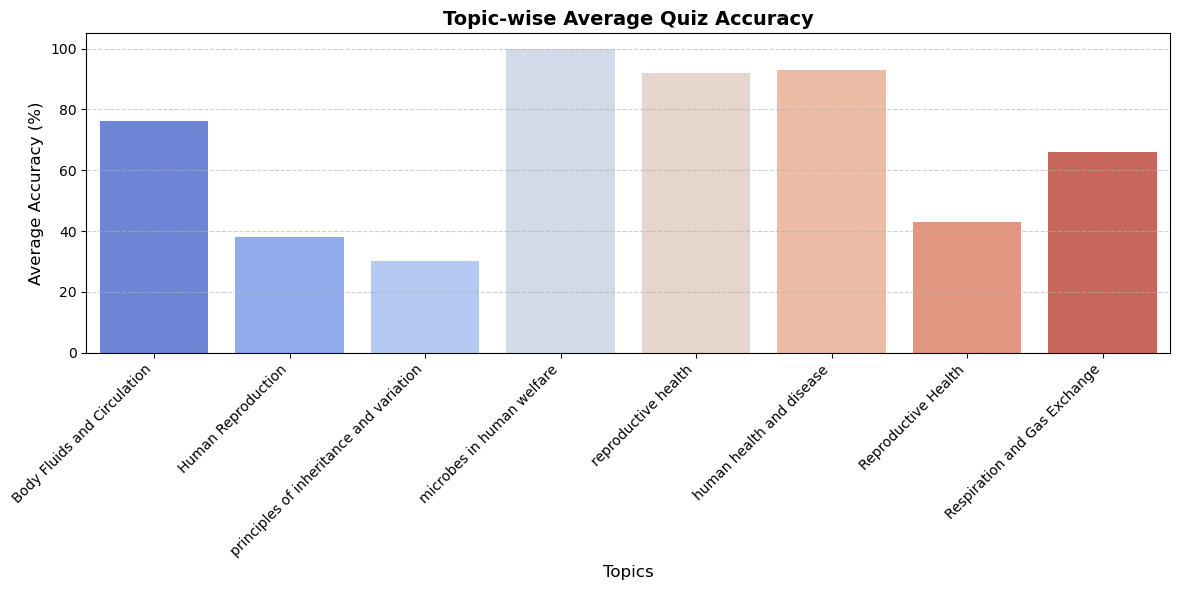

In [11]:
# Setting a consistent color palette
sns.set_palette("coolwarm")

# Extracting topic names and average accuracies for visualization
topics = list(topic_performance.keys())
avg_accuracies = [data['avg_accuracy'] for data in topic_performance.values()]

# 1. Topic-wise Average Accuracy - Bar Chart 
plt.figure(figsize=(12, 6))
sns.barplot(x=topics, y=avg_accuracies, hue=topics, palette=sns.color_palette("coolwarm", len(topics)), dodge=False, legend=False)
plt.xlabel("Topics", fontsize=12)
plt.ylabel("Average Accuracy (%)", fontsize=12)
plt.title("Topic-wise Average Quiz Accuracy", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

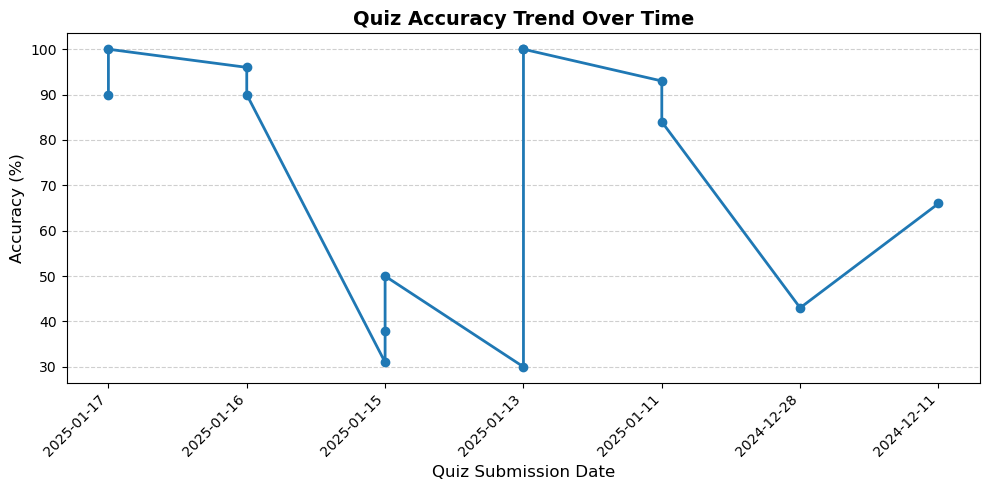

In [13]:
# 2. Accuracy Trend Over Time - Line Chart
accuracy_trend_dates = [datetime.datetime.fromisoformat(p['submitted_at']).strftime('%Y-%m-%d') for p in performance_history]
accuracy_values = [p['accuracy'] for p in performance_history]

plt.figure(figsize=(10, 5))
plt.plot(accuracy_trend_dates, accuracy_values, marker='o', linestyle='-', color='#1f78b4', linewidth=2, markersize=6)
plt.xlabel("Quiz Submission Date", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Quiz Accuracy Trend Over Time", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

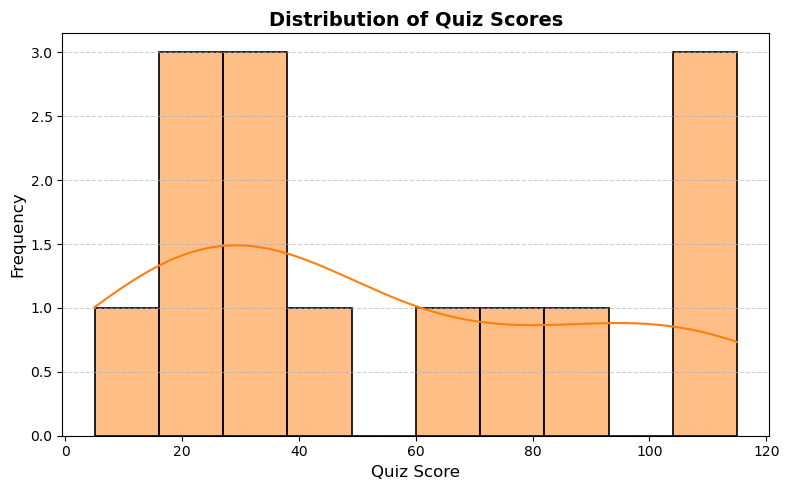

In [15]:
# 3. Quiz Score Distribution - Histogram
quiz_scores = [p['score'] for p in performance_history]

plt.figure(figsize=(8, 5))
sns.histplot(quiz_scores, bins=10, kde=True, color='#ff7f0e', edgecolor='black', linewidth=1.2)
plt.xlabel("Quiz Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Quiz Scores", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

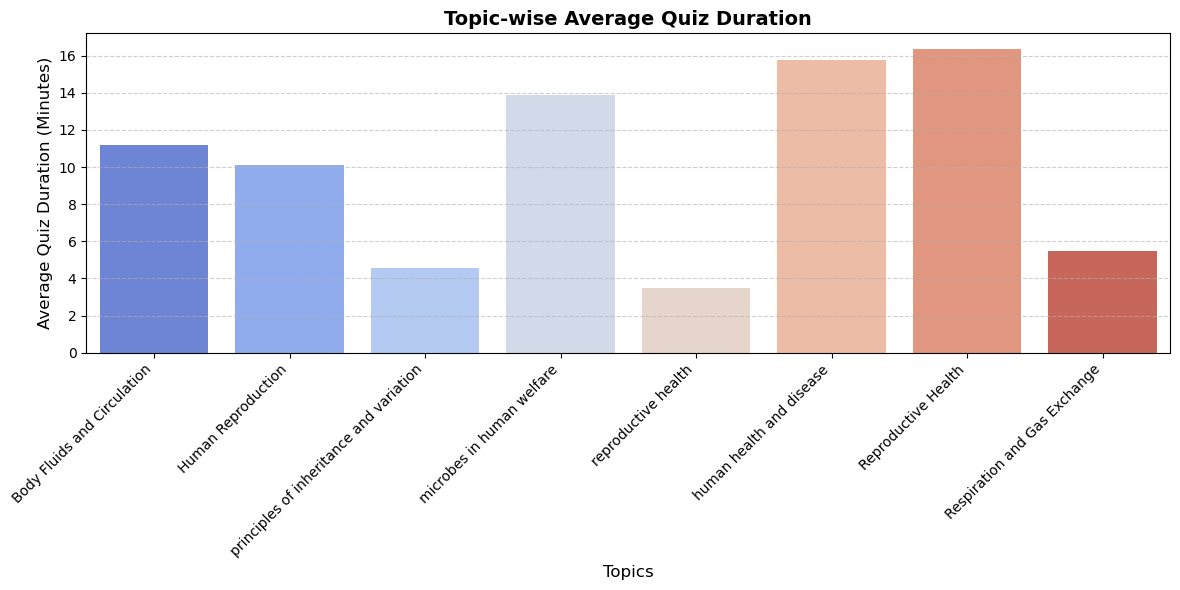

In [17]:
# 4. Topic-wise Average Quiz Duration - Bar Chart
topic_durations = [perf['avg_duration_minutes'] for perf in topic_performance.values()]

plt.figure(figsize=(12, 6))
sns.barplot(x=topics, y=topic_durations, hue=topics, palette=sns.color_palette("coolwarm", len(topics)), dodge=False, legend=False)
plt.xlabel("Topics", fontsize=12)
plt.ylabel("Average Quiz Duration (Minutes)", fontsize=12)
plt.title("Topic-wise Average Quiz Duration", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

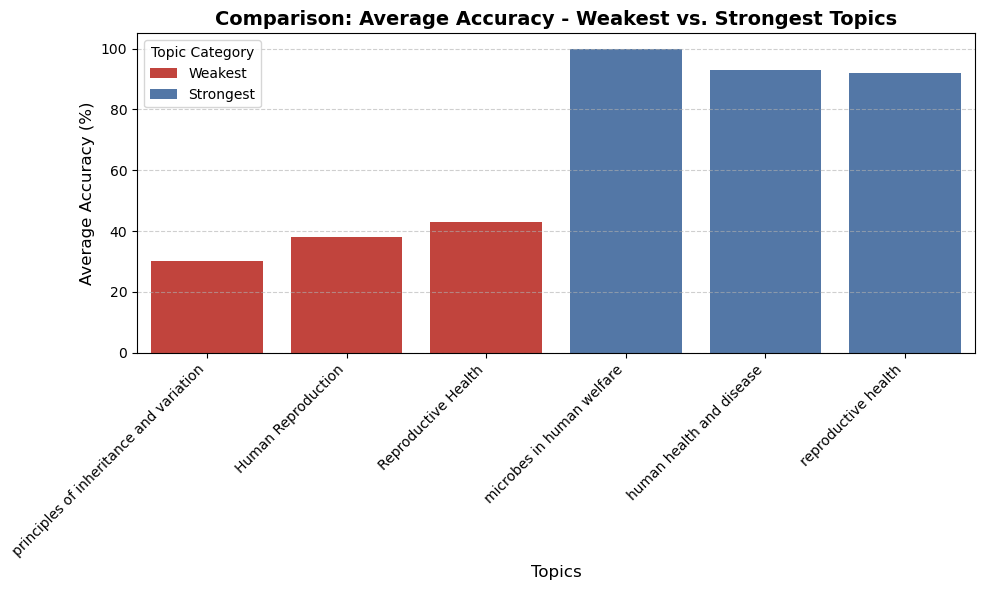

In [19]:
# Comparing of Weakest vs. Strongest Topics - Bar Chart
weakest_topics_names = [topic for topic, _ in sorted_topic_performance_weakest[:3]]
weakest_topics_accuracies = [topic_performance[topic]['avg_accuracy'] for topic in weakest_topics_names]
strongest_topics_names = [topic for topic, _ in sorted_topic_performance_strongest[:3]]
strongest_topics_accuracies = [topic_performance[topic]['avg_accuracy'] for topic in strongest_topics_names]

# Combining weak and strong topics into a DataFrame
df_combined = pd.DataFrame({
    'Topic': weakest_topics_names + strongest_topics_names,
    'Average Accuracy': weakest_topics_accuracies + strongest_topics_accuracies,
    'Category': ['Weakest'] * len(weakest_topics_names) + ['Strongest'] * len(strongest_topics_names)
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Topic', y='Average Accuracy', hue='Category', data=df_combined, palette=['#d73027', '#4575b4'])
plt.xlabel("Topics", fontsize=12)
plt.ylabel("Average Accuracy (%)", fontsize=12)
plt.title("Comparison: Average Accuracy - Weakest vs. Strongest Topics", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.legend(title="Topic Category")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Key Insights & Recommendations:
#### Based on the analysis, the script provides personalized study insights, such as:

- Students performing below 40% accuracy in a topic are advised to start with easier quizzes.
  
- If quiz-taking speed is too fast with low accuracy, slowing down is recommended.
  
- Strong topics should still be revised to maintain performance.


These insights help students focus on weak areas while reinforcing their strengths